In [151]:
from PIL import Image
import numpy as np
import math
from scipy import signal
import cv2
from IPython.display import Image 


In [152]:
# PART 2. Question 1. (3 points)
# Parameter :: odd, positive integer n
# Returns :: n x n array representing a box filter, AssertionError if n is not odd
def boxFilter(n):
  # throw AssertionError if n is not odd
  assert n % 2 == 1 and n >= 1, "Dimension must be odd"
  # create an n x n matrix of zeros, then add the value needed to make the filter sum to 1
  return np.zeros((n,n)) + (1/n**2)

In [153]:
boxFilter(3)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [176]:
boxFilter(4)

AssertionError: ignored

In [155]:
boxFilter(5)

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [156]:
# Question 2. (5 points)
# Paramter :: sigma - positive real number
# Returns :: 1D Guassian filter for the value of sigma where, the length is 6x sigma rounded to the next odd integer
def gauss1d(sigma):
  # get the correct filter length
  filter_length = math.ceil(sigma * 6)
  if (filter_length % 2 == 0):
    filter_length += 1
  
  # create the array with values that will help keep track of their distance from the center
  half_length = np.floor(filter_length/2)
  x = np.arange(start=-half_length, stop=half_length+1, step=1)
  
  # pass the 1D array "filter" into density function
  density_fn = np.exp(-x**2/(2*sigma**2))
  # normalize
  filter = 1.0/(np.sum(density_fn))*density_fn

  return np.array(filter)

In [157]:
gauss1d(0.3)

array([0.00383626, 0.99232748, 0.00383626])

In [158]:
gauss1d(0.5)

array([0.10650698, 0.78698604, 0.10650698])

In [159]:
gauss1d(1)

array([0.00443305, 0.05400558, 0.24203623, 0.39905028, 0.24203623,
       0.05400558, 0.00443305])

In [160]:
gauss1d(2)

array([0.0022182 , 0.00877313, 0.02702316, 0.06482519, 0.12110939,
       0.17621312, 0.19967563, 0.17621312, 0.12110939, 0.06482519,
       0.02702316, 0.00877313, 0.0022182 ])

In [161]:
# Question 3. (5 points)
# Paramter :: sigma - positive real number
# Returns :: 2D Guassian filter for a given value of sigma
def gauss2d(sigma):
  # get 1d Gaussian filter
  filter_1d = gauss1d(sigma)

  # make 2D array by convoluting filter_1d with its transpose
  # convert to 2D array
  gauss_2d = filter_1d[np.newaxis]
  transpose = np.transpose(filter_1d[np.newaxis])
  return signal.convolve2d(gauss_2d, transpose)

In [162]:
gauss2d(0.5)

array([[0.01134374, 0.08381951, 0.01134374],
       [0.08381951, 0.61934703, 0.08381951],
       [0.01134374, 0.08381951, 0.01134374]])

In [163]:
gauss2d(1)

array([[1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [1.76900911e-03, 2.15509428e-02, 9.65846250e-02, 1.59241126e-01,
        9.65846250e-02, 2.15509428e-02, 1.76900911e-03],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05]])

In [164]:
# Question 4a. (10 points)
# Parameters :: array (np.float32 array) - image 
#            :: filter (np.float32 array) - given filter than will be used on array
# Returns :: Convolution of the filter on the array with zero padding (k 0's around the sides)
def convolve2d_manual(array, filter):
  # the filter is a square, m == width == height
  m = filter.shape[0]

  # the filter is n x n where n is a positive, odd number. k denotes the number of 0's to pad each side with
  k = int(np.floor(m/2))

  # pad with 0's
  img = np.pad(array, ((k, k), (k, k)), mode='constant', constant_values=((0.0, 0.0), (0.0, 0.0)))

  # rotate filter 180 (2*90) degrees because it's a convolution
  # Don't need to do this
  # filter = np.rot90(filter, k=2)

  # initialize resulting image with array's height and width
  result = np.zeros((array.shape[0], array.shape[1]))

  # apply filter (convolution)
  for row in range(k, result.shape[0]-k):
    for col in range(k, result.shape[1]-k):
      neighbours = img[row:(row+m), col:(col+m)]
      result[row][col] = np.sum(neighbours * filter)
  return result

In [165]:
arr = np.array([[1, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 0], [2.0, 1.0, 0, 0, 0], [0, 0, 0, 0, 0]])
filter = boxFilter(3)
convolve2d_manual(arr, filter)

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.11111111, 0.        , 0.11111111, 0.        ],
       [0.        , 0.33333333, 0.11111111, 0.11111111, 0.        ],
       [0.        , 0.33333333, 0.11111111, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [166]:
# Question 4b.
# Parameters :: array (np.float32 array) - image 
#            :: sigma (np.float32 array) - given filter than will be used on array
# Returns :: Convolution of the filter with sigma value given on the array
def gaussconvolve2d_manual(array, sigma):
  # generate filter
  filter = gauss2d(sigma)

  # apply filter to array
  return convolve2d_manual(array, filter)


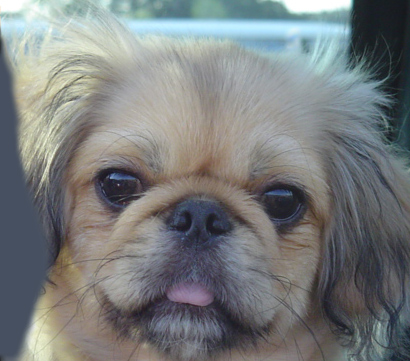

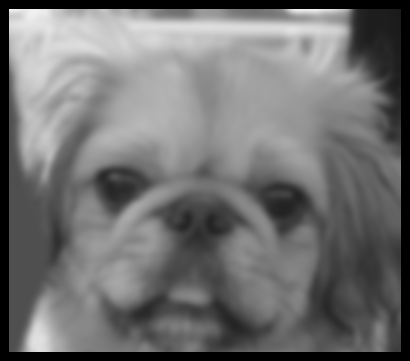

In [167]:
# Question 4c. 
# load image and convert to greyscale
from PIL import Image

img = Image.open('dog.jpg')
# convert to greyscale
img_grey = img.convert('L')

# to an array so that we can pass into gaussconvolve2d_manual
img_grey_array = np.asarray(img_grey, dtype=np.float32)
img_grey_array_copy = img_grey_array.copy()

filtered_img = gaussconvolve2d_manual(img_grey_array_copy, 3)

# convert back to unsigned int to display properly
filtered_img = Image.fromarray(filtered_img.astype('uint8'))
filtered_img.save('filtered_dog_4c.png', 'PNG')

# Question 4d.
display(img)

filtered_img = Image.open('filtered_dog_4c.png')
display(filtered_img)



In [168]:
# Question 5a. (7 points)
# Parameters :: - array, image
#            :: - sigma, value used in gaussian convolution
# Returns :: Gaussian convolution to a 2D array for the given sigma value
def gaussconvolve2d_scipy(array, sigma):
  filter = gauss2d(sigma)
  return signal.convolve2d(array, filter, 'same')

Scipy has both signal.convolve2d and signal.correlate2d because when convoluting, the filter is rotated 180 degrees, resulting in a differences when the filter is not symmetrical.


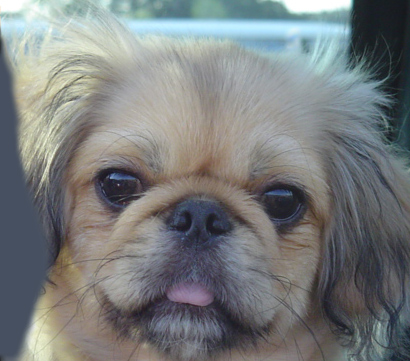

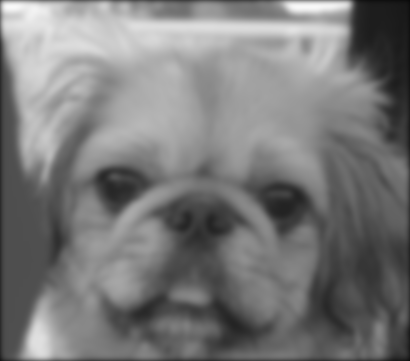

In [169]:
# Question 5b.
filtered_img_scipy_array = gaussconvolve2d_scipy(img_grey_array_copy, 3)

filtered_img_scipy = Image.fromarray(filtered_img_scipy_array.astype('uint8'))
filtered_img_scipy.save('filtered_dog_5b.png', 'PNG')

# Question 5c. display both images before and after the convolution
display(img)

filtered_img = Image.open('filtered_dog_5b.png')
display(filtered_img)

In [170]:
# Question 6. (2 points)
import time
t1 = time.time() # start timestamp
gaussconvolve2d_manual(img_grey_array_copy, 10.0) # operation to time
manual_time = time.time() - t1 # duration in seconds
print(f"manual: {manual_time}")

t2 = time.time()
gaussconvolve2d_scipy(img_grey_array_copy, 10.0)
scipy_time = time.time() - t2
print(f"scipy: {scipy_time}")


manual: 1.65278959274292
scipy: 1.788839340209961


Although both functions call gauss2d(sigma) with the same value of sigma (10.0), the only difference is that gaussconvolve2d_manual calls convolve2d_manual(). I would expect the scipy implementation for convolution to be optimized and much faster than our manual one. Although I do think much time has been made up in convolve2d_manual() due to zero padding, edging it slightly ahead of the scipy implementation.


Question 7. (3 points)

A 2D Gaussian convolution can be implemented more efficiently by taking advantage of separability. A naive approach runs in *O(m^2 x n^2)* time where there are *m^2* multiplications at every pixel. The 2D Gaussian equation *F(X, Y)* can be separated into the product of two functions *F(X)F(Y)*, both of which are 1D having dimensions *(1,m)* and *(m,1)*. We can individually apply both of these 1D filters to the image, meaning there will only be *2m* multiplications at every pixel, a good improvement from *m^2*. Therefore, the final runtime of convolving with two 1D filters is *O(2m x n^2)*

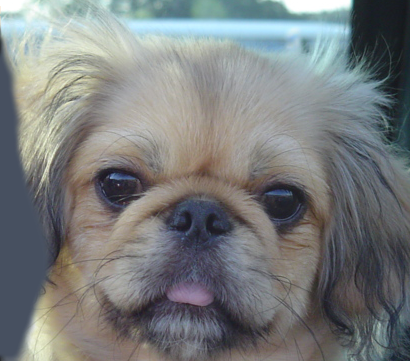

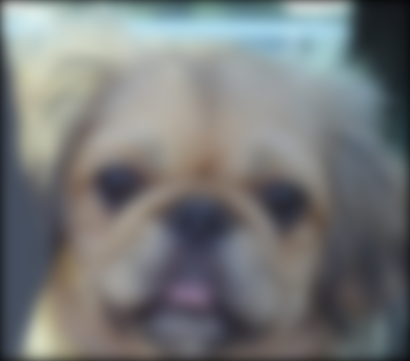

In [171]:
# PART 3 Question 1. (3 points)
dog_original = Image.open('hw1/0b_dog.bmp')
display(dog_original)

# to array
dog_original_array_copy = np.asarray(dog_original, dtype=np.float32)
dog_original_array = dog_original_array_copy.copy()
# create an n-dimensional np.array with dog_original's dimensions
dog_filtered_result_array = np.ndarray(dog_original_array.shape)

# extract each colour channel (RGB), convolve each one, and add them to result array
for colour in range(0,3):
  # access each colour channel by [:,:,0] = Red, [:,:,1] = Green, [:,:,2] = Blue
  dog_original_channel_array = dog_original_array[:,:,colour]
  dog_filtered_channel_array = gaussconvolve2d_scipy(dog_original_channel_array, 7.0)
  dog_filtered_result_array[:,:,colour] = dog_filtered_channel_array

dog_filtered = Image.fromarray(dog_filtered_result_array.astype('uint8'))
dog_filtered.save('hw1/0b_dog_filtered.png', 'PNG')
display(dog_filtered)


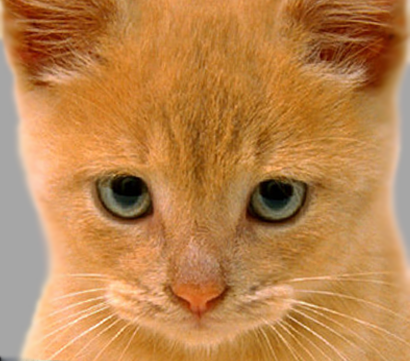

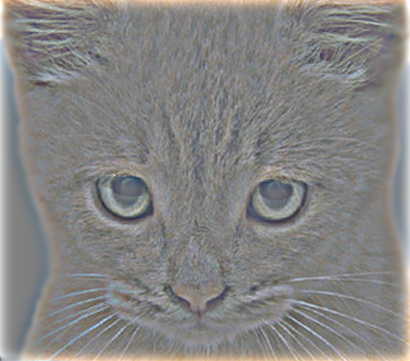

In [172]:
# Question 2. (3 points)
# high frequency image is obtained by: computing low frequency Gaussian filtered image
# then subtracting it from the original. Add 128 
cat_original = Image.open('hw1/0a_cat.bmp')
display(cat_original)

# to array
cat_original_array_copy = np.asarray(cat_original, dtype=np.float32)
cat_original_array = cat_original_array_copy.copy()
# create an n-dimensional np.array with cat_original's dimensions
cat_filtered_result_array = np.ndarray(cat_original_array.shape)

# extract each colour channel (RGB), convolve each one, and add them to result array
for colour in range(0,3):
  # access each colour channel by [:,:,0] = Red, [:,:,1] = Green, [:,:,2] = Blue
  cat_original_channel_array = cat_original_array[:,:,colour]
  cat_filtered_channel_array = gaussconvolve2d_scipy(cat_original_channel_array, 7.0)
  cat_filtered_result_array[:,:,colour] = cat_filtered_channel_array

# The high frequency image is actually zero-mean with negative values so it is visualized by adding 128
cat_high_freq_array = cat_original_array - cat_filtered_result_array
# limit the values in the cat_high_freq_array to between 0 and 255 for viewing
cat_high_freq_visualize_array = np.clip((cat_high_freq_array + 128), 0.0, 255.0)

cat_filtered = Image.fromarray(cat_high_freq_visualize_array.astype('uint8'))
cat_filtered.save('hw1/0a_cat_filtered.png', 'PNG')
display(cat_filtered)

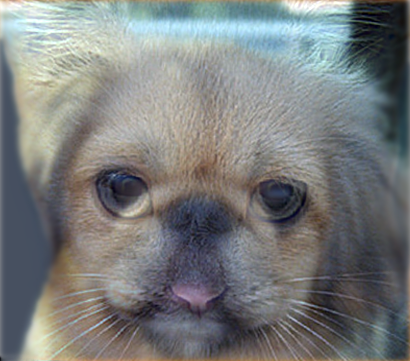

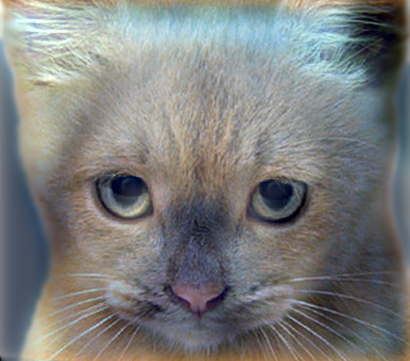

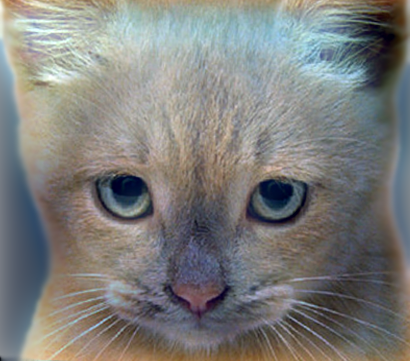

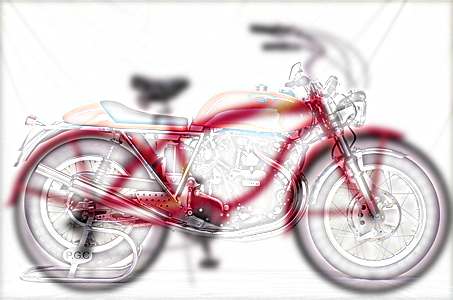

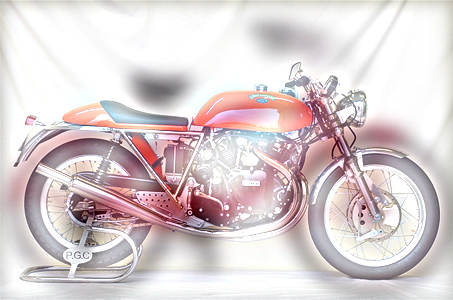

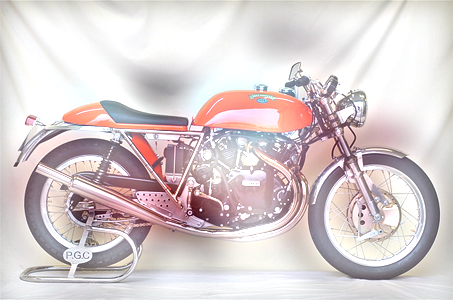

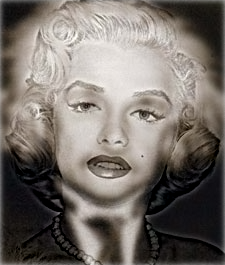

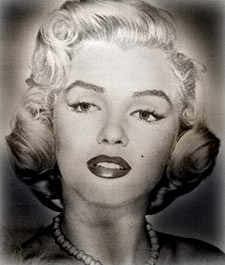

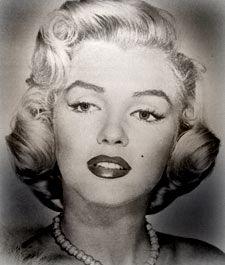

In [173]:
# Question 3. (4 points)

# returns the original image and Gauss filtered arrays
def GaussFilter(file, sigma):
  img_original = Image.open(file)
  img_original_array_copy = np.asarray(img_original, dtype=np.float32)
  img_original_array = img_original_array_copy.copy()

  img_result_array = np.ndarray(img_original_array.shape)

  for colour in range(0, 3):
    img_original_channel_array = img_original_array[:,:,colour]
    img_filtered_channel_array = gaussconvolve2d_scipy(img_original_channel_array, sigma)
    img_result_array[:,:,colour] = img_filtered_channel_array
  return img_original_array, img_result_array

def mixImages(file1, file2, sigma):
  img1_low_freq_array = GaussFilter(file1, sigma)[1]
  img2_original_array, img2_low_freq_array = GaussFilter(file2, sigma)

  img2_high_freq = img2_original_array - img2_low_freq_array
  img_mixed_array = np.clip((img2_high_freq + img1_low_freq_array), 0.0, 255.0)

  mixed = Image.fromarray(img_mixed_array.astype('uint8'))
  mixed_path = f"hw1/mixed_sigma={sigma}_{file1[4:-4]}_{file2[4:-4]}.png"
  mixed.save(mixed_path, "PNG")
  display(mixed)


mixImages("hw1/0b_dog.bmp", "hw1/0a_cat.bmp", 3.0)
mixImages("hw1/0b_dog.bmp", "hw1/0a_cat.bmp", 9.0)
mixImages("hw1/0b_dog.bmp", "hw1/0a_cat.bmp", 15.0)

mixImages("hw1/1a_bicycle.bmp", "hw1/1b_motorcycle.bmp", 3.0)
mixImages("hw1/1a_bicycle.bmp", "hw1/1b_motorcycle.bmp", 9.0)
mixImages("hw1/1a_bicycle.bmp", "hw1/1b_motorcycle.bmp", 15.0)

mixImages("hw1/2a_einstein.bmp", "hw1/2b_marilyn.bmp", 3.0)
mixImages("hw1/2a_einstein.bmp", "hw1/2b_marilyn.bmp", 9.0)
mixImages("hw1/2a_einstein.bmp", "hw1/2b_marilyn.bmp", 15.0)


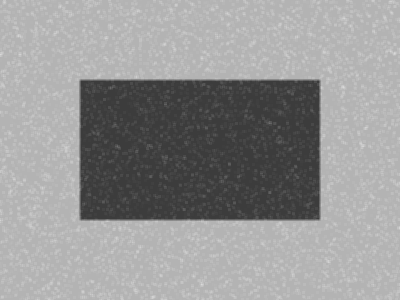

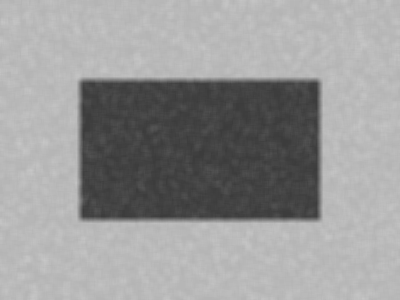

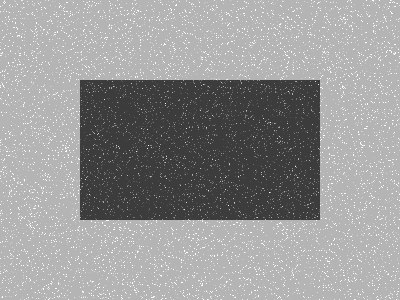

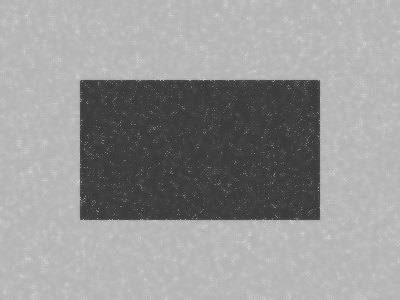

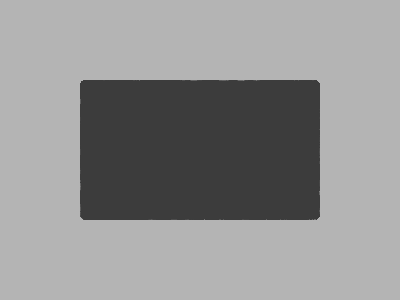

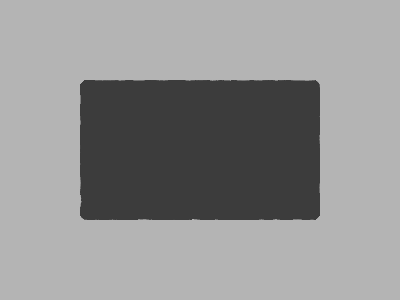

In [188]:
# PART 4. Question 1. (6 points)
import cv2
img_gauss = cv2.imread("box_gauss.png")
img_speckle = cv2.imread("box_speckle.png")


# Gaussian noise with Gaussian Blur filter
img_gauss_noise_gauss_filter_array = cv2.GaussianBlur(img_gauss, ksize=(3,3), sigmaX=50)
img_gauss_noise_gauss_filter = Image.fromarray(img_gauss_noise_gauss_filter_array.astype('uint8'))
img_gauss_noise_gauss_filter.save('gauss_noise_gauss_filter.png', 'PNG')
display(img_gauss_noise_gauss_filter)

# Speckle noise with Gaussian Blur filter
img_speckle_noise_gauss_filter_array = cv2.GaussianBlur(img_speckle, ksize=(7,7), sigmaX=5)
img_speckle_noise_gauss_filter = Image.fromarray(img_speckle_noise_gauss_filter_array.astype('uint8'))
img_speckle_noise_gauss_filter.save('speckle_noise_gauss_filter.png', 'PNG')
display(img_speckle_noise_gauss_filter)



# Gaussian noise with Bilateral filter
img_gauss_noise_bilateral_filter_array = cv2.bilateralFilter(img_gauss, 7, sigmaColor=9, sigmaSpace=9)
img_gauss_noise_bilateral_filter = Image.fromarray(img_gauss_noise_bilateral_filter_array.astype('uint8'))
img_gauss_noise_bilateral_filter.save('gauss_noise_bilateral_filter.png', 'PNG')
display(img_gauss_noise_bilateral_filter)

# Speckle noise with Bilateral filter
img_speckle_noise_bilateral_filter_array = cv2.bilateralFilter(img_speckle, 7, sigmaColor=200, sigmaSpace=200)
img_speckle_noise_bilateral_filter = Image.fromarray(img_speckle_noise_bilateral_filter_array.astype('uint8'))
img_speckle_noise_bilateral_filter.save('speckle_noise_bilateral_filter.png', 'PNG')
display(img_speckle_noise_bilateral_filter)



# Gaussian noise with Median Blur filter
img_gauss_noise_median_filter_array = cv2.medianBlur(img_gauss,ksize=7)
img_gauss_noise_median_filter = Image.fromarray(img_gauss_noise_median_filter_array.astype('uint8'))
img_gauss_noise_median_filter.save('gauss_noise_median_filter.png', 'PNG')
display(img_gauss_noise_median_filter)


# Speckle noise with Median Blur filter
img_speckle_noise_median_filter_array = cv2.medianBlur(img_speckle,ksize=9)
img_speckle_noise_median_filter = Image.fromarray(img_speckle_noise_median_filter_array.astype('uint8'))
img_speckle_noise_median_filter.save('speckle_noise_median_filter.png', 'PNG')
display(img_speckle_noise_median_filter)

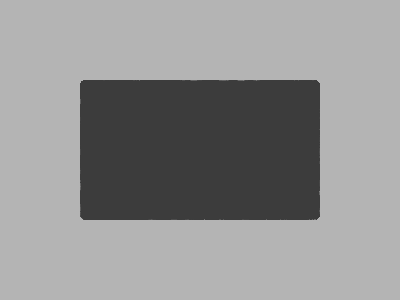

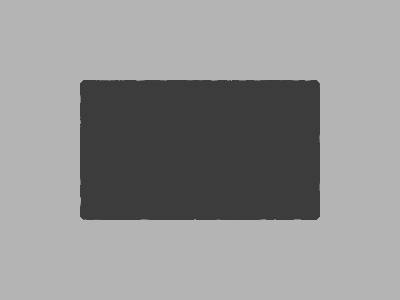

In [175]:
# Question 2. (3 points)

img_gauss_multi_filter = cv2.GaussianBlur(img_gauss, ksize=(7,7), sigmaX=50)
img_gauss_multi_filter = cv2.bilateralFilter(img_gauss, 7, sigmaColor=150, sigmaSpace=150)
img_gauss_multi_filter = cv2.medianBlur(img_gauss,7)
img_gauss_noise_multi_filter = Image.fromarray(img_gauss_multi_filter.astype('uint8'))
img_gauss_noise_multi_filter.save('gauss_noise_multi_filter.png', 'PNG')
display(img_gauss_noise_multi_filter)

img_speckle_multi_filter = cv2.GaussianBlur(img_speckle, ksize=(7,7), sigmaX=50)
img_speckle_multi_filter = cv2.bilateralFilter(img_speckle, 7, sigmaColor=150, sigmaSpace=150)
img_speckle_multi_filter = cv2.medianBlur(img_speckle,7)
img_speckle_noise_multi_filter = Image.fromarray(img_speckle_multi_filter.astype('uint8'))
img_speckle_noise_multi_filter.save('speckle_noise_multi_filter.png', 'PNG')
display(img_speckle_noise_multi_filter)

Pros to using Gaussian Blur: Can convolve in *O(m x n^2)* time. 

Cons to using Gaussian Blur: Rounds edges, denoising effects are very hard to see with changes of both kernel and sigma sizes. Clarity can be increased by a decrease in kernel size.

---

Pros to using Bilateral Filter: Reduces noise well while keeping edges sharp. 

Cons to using Bilateral Filter: It is very slow compared to most filters. Doesn't have much effect on noise when sigma values are small (< 10), though when too large (> 150), make the image look cartoon-like. Although, smaller sigma values seem to correlate with increased image clarity

---

Pros to using Median Filter: Does an excellent job at reducing noise by taking the median value in the neighbourhood, helping to reduce noise and keeping edges sharp. 